In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
warnings.filterwarning("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('testset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
Date         125 non-null object
Open         125 non-null float64
High         125 non-null float64
Low          125 non-null float64
Close        125 non-null float64
Adj Close    125 non-null float64
Volume       125 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


### Feature Engineering

In [4]:
df['% Change'] = ((df['Close']-df['Open'])/df['Close'])*100
df['High_Low %'] = ((df['High']-df['Low'])/df['Low'])*100

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PCT_Change,HL_PCT
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600,1.564322,2.077051
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200,1.678546,2.170792
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600,-0.147273,0.882655
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100,0.746666,1.121795
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600,0.425494,0.875985


In [6]:
df = df.set_index(df['Date'])
df = df.drop('Date', axis=1)

In [7]:
df_new = df[['Adj Close', 'Change %', 'High_Low %', 'Volume']]

In [8]:
df_new.head()

,Adj Close,PCT_Change,HL_PCT,Volume
Date,,,,
2018-01-02,1065.000000,1.564322,2.077051,1237600
2018-01-03,1082.479980,1.678546,2.170792,1430200
2018-01-04,1086.400024,-0.147273,0.882655,1004600
2018-01-05,1102.229980,0.746666,1.121795,1279100
2018-01-08,1106.939941,0.425494,0.875985,1047600


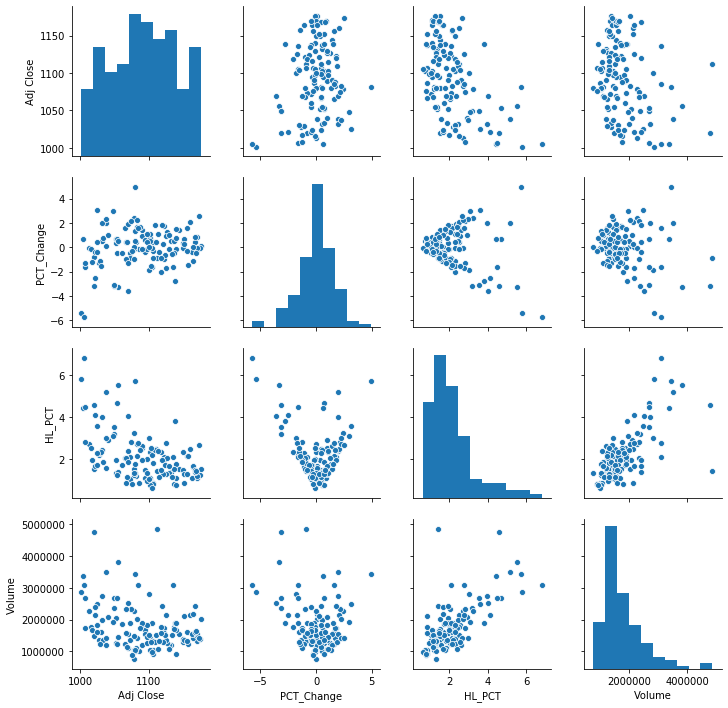

In [9]:
sns.pairplot(df_new )

In [10]:
df_new.corr()

,Adj Close,PCT_Change,HL_PCT,Volume
Adj Close,1.000000,0.193917,-0.493705,-0.288009
PCT_Change,0.193917,1.000000,-0.225849,-0.211152
HL_PCT,-0.493705,-0.225849,1.000000,0.683111
Volume,-0.288009,-0.211152,0.683111,1.000000


In [11]:
forecast_col = 'Adj Close'

In [58]:
forecast_out = int(math.ceil(0.1*len(df)))
forecast_out

13

In [13]:
df_new['Label'] = df[forecast_col].shift(-forecast_out)

/home/bluearc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_new.head()

,Adj Close,PCT_Change,HL_PCT,Volume,Label
Date,,,,,
2018-01-02,1065.000000,1.564322,2.077051,1237600,1155.810059
2018-01-03,1082.479980,1.678546,2.170792,1430200,1169.969971
2018-01-04,1086.400024,-0.147273,0.882655,1004600,1164.239990
2018-01-05,1102.229980,0.746666,1.121795,1279100,1170.369995
2018-01-08,1106.939941,0.425494,0.875985,1047600,1175.839966


In [15]:
df_new.dropna(inplace=True)

/home/bluearc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
X = df_new.drop('Label', axis=1)
y = df_new['Label']

In [18]:
X = preprocessing.scale(X)

In [19]:
print(len(X), len(y))

112 112


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lr.score(x_test, y_test)

-0.054863482854973666

In [38]:
#X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [57]:
X_lately

array([[-0.1515094 , -0.01480468, -0.70508237, -1.41106535],
       [-0.22825166, -0.22280405, -1.14307312, -1.21958717],
       [-0.55709177, -0.29655664, -0.39066618,  0.06610956],
       [-0.39674342,  0.24906438, -0.84834043, -0.89853225],
       [-0.02824866,  0.96999946,  0.48986421,  1.7195894 ],
       [ 0.71153037,  1.09025591, -0.19278508,  0.81147797],
       [ 1.13576252,  0.8967672 , -0.3470742 ,  0.09712741],
       [ 1.14369398, -0.10117087, -0.90181965, -0.17411096],
       [ 1.08409947, -0.3178808 , -0.54674371, -0.14698712],
       [ 0.80499385, -0.44125508, -0.38352836, -0.3862677 ],
       [ 0.74089848,  0.1205557 , -0.73642121, -0.69402926],
       [ 0.93640062,  0.59796171, -0.43393384, -0.97802389],
       [ 1.13640363,  0.42150606, -1.15753389, -1.20266834]])

In [39]:
X.shape

(112, 4)

In [40]:
forecast_set = lr.predict(X_lately)

In [41]:
forecast_set

array([1101.80188717, 1108.20740913, 1100.75963142, 1106.56511798,
       1091.36527788, 1096.45467774, 1094.96432008, 1099.7999105 ,
       1094.44775842, 1092.79986103, 1099.24711305, 1094.78615501,
       1103.37930416])

In [42]:
forecast_set.shape

(13,)

In [43]:
from matplotlib import style
style.use('ggplot')

In [44]:
df_new['forecast'] = np.nan

/home/bluearc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_new.shape

(112, 6)

In [46]:
last_date = df.index[-1]
last_date = pd.to_datetime(last_date)

In [47]:
last_date 

Timestamp('2018-06-29 00:00:00')

In [48]:
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix+one_day

In [49]:
last_unix

1530230400.0

In [50]:
import datetime

In [51]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df_new.loc[next_date] = [np.nan for _ in range(len(df_new.columns)-1)] + [i]

/home/bluearc/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
df_new.head()

,Adj Close,PCT_Change,HL_PCT,Volume,Label,forecast
Date,,,,,,
2018-01-02,1065.000000,1.564322,2.077051,1237600.0,1155.810059,NaN
2018-01-03,1082.479980,1.678546,2.170792,1430200.0,1169.969971,NaN
2018-01-04,1086.400024,-0.147273,0.882655,1004600.0,1164.239990,NaN
2018-01-05,1102.229980,0.746666,1.121795,1279100.0,1170.369995,NaN
2018-01-08,1106.939941,0.425494,0.875985,1047600.0,1175.839966,NaN


In [53]:
df_new.index = pd.to_datetime(df_new.index)

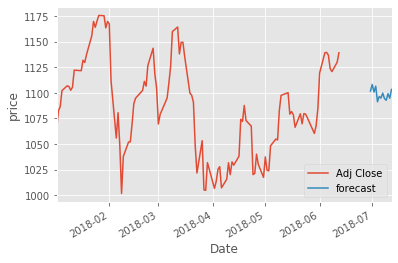

In [54]:
df_new['Adj Close'].plot()
df_new['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

In [55]:
df_new.tail(20)

,Adj Close,PCT_Change,HL_PCT,Volume,Label,forecast
Date,,,,,,
2018-06-04,1139.290039,1.488654,1.772275,1880000.0,1157.660034,NaN
2018-06-05,1139.660034,-0.116698,1.107325,1678000.0,1155.479980,NaN
2018-06-06,1136.880005,-0.465312,1.532939,1698200.0,1124.810059,NaN
2018-06-07,1123.859985,-0.663780,1.728579,1520000.0,1118.459961,NaN
2018-06-08,1120.869995,0.239987,1.305581,1290800.0,1103.979980,NaN
2018-06-11,1129.989990,1.007975,1.668160,1079300.0,1114.219971,NaN
2018-06-12,1139.319946,0.724116,0.800811,912000.0,1115.650024,NaN
2018-06-30,NaN,NaN,NaN,NaN,NaN,1101.801887
2018-07-01,NaN,NaN,NaN,NaN,NaN,1108.207409


In [59]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,PCT_Change,HL_PCT
Date,,,,,,,,
2018-06-04,1122.329956,1141.890015,1122.005005,1139.290039,1139.290039,1880000,1.488654,1.772275
2018-06-05,1140.989990,1145.738037,1133.189941,1139.660034,1139.660034,1678000,-0.116698,1.107325
2018-06-06,1142.170044,1143.000000,1125.743042,1136.880005,1136.880005,1698200,-0.465312,1.532939
2018-06-07,1131.319946,1135.819946,1116.520020,1123.859985,1123.859985,1520000,-0.663780,1.728579
2018-06-08,1118.180054,1126.670044,1112.150024,1120.869995,1120.869995,1290800,0.239987,1.305581
2018-06-11,1118.599976,1137.260010,1118.599976,1129.989990,1129.989990,1079300,1.007975,1.668160
2018-06-12,1131.069946,1139.790039,1130.734985,1139.319946,1139.319946,912000,0.724116,0.800811
2018-06-13,1141.119995,1146.500000,1133.380005,1134.790039,1134.790039,1506400,-0.557809,1.157599
2018-06-14,1143.849976,1155.469971,1140.640015,1152.119995,1152.119995,1343400,0.717809,1.300143
